# Mechine Learning

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

In [194]:
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


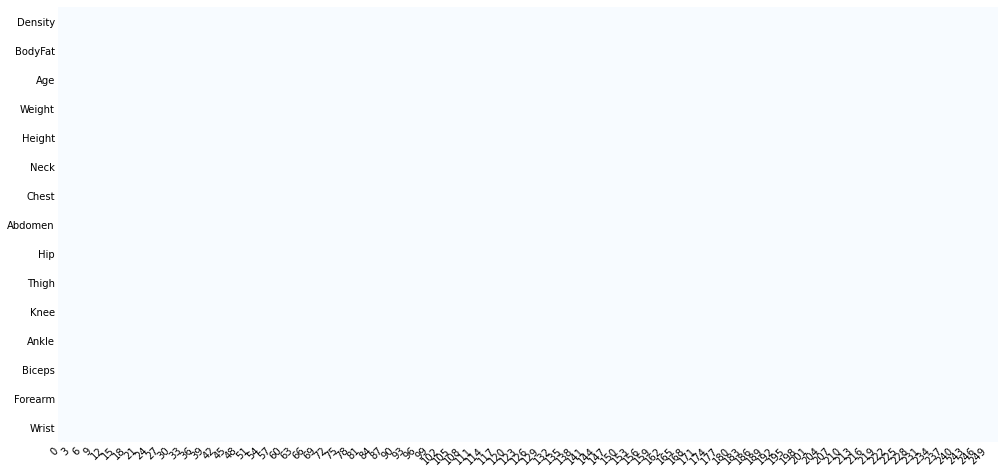

In [195]:
plot_missing_value(df)

In [196]:
X = df.drop(columns=["BodyFat"])
y = df["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 14), (76, 14), (176,), (76,))

In [202]:
from sklearn.neighbors import KNeighborsRegressor 
from jcopml.tuning import grid_search_params as gsp
from sklearn.model_selection import RandomizedSearchCV

In [209]:
preprocesor = ColumnTransformer([
    ("numeric", num_pipe(scaling='minmax', poly=2,), X_train.columns),
])

pipeline = Pipeline([
    ("prep", preprocesor),
    ("algo", KNeighborsRegressor())
])

#Tuning
model = RandomizedSearchCV(pipeline, gsp.knn_poly_params ,cv=3, n_jobs=-1, verbose=1,n_iter=50)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train),  model.score(X_test, y_test), model.best_score_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'prep__numeric__poly__interaction_only': False, 'prep__numeric__poly__degree': 1, 'algo__weights': 'distance', 'algo__p': 1, 'algo__n_neighbors': 7}
1.0 0.7872692895218194 0.7810300915839689


In [206]:
y_pred = model.predict(X_test)

In [207]:
test_data = pd.DataFrame({'Test Actual':y_test,'Test Predicted':y_pred})
test_data.head(20)

,Test Actual,Test Predicted
165,19.2,21.233333
6,19.2,16.500000
111,28.0,26.966667
172,20.5,16.433333
115,16.7,16.500000
183,12.1,15.566667
199,23.6,20.700000
235,18.6,25.400000
9,11.7,16.566667
30,11.9,10.400000


In [9]:
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
r2_score_ridge = r2_score(y_test, y_pred)
r2_score_ridge

0.7622688803446918

In [11]:
r2_score_ridge = mean_squared_error(y_test, y_pred, squared=False)
r2_score_ridge

3.5079042813934533

# ANN

In [12]:
#Modules for EDA
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

#Modules for ML
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

2021-10-15 05:23:41.988122: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-15 05:23:41.988181: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [13]:
df = pd.read_csv('./bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [60]:
X = df.drop(columns=["BodyFat"])
y = df["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176, 14), (76, 14), (176,), (76,))

In [61]:
# normalizer = tf.keras.layers.Normalization(axis=-1)

feture = np.array(X_train)

feture_normalizer = keras.layers.Normalization(axis=-1)
feture_normalizer.adapt(feture)

In [62]:
model = keras.Sequential([
    feture_normalizer,
    keras.layers.Dense(14,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1),
    
])

model.compile(loss='mean_absolute_error',optimizer=keras.optimizers.Adam(0.001))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 14)                29        
_________________________________________________________________
dense_5 (Dense)              (None, 14)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 494
Trainable params: 465
Non-trainable params: 29
_______________________________________________________

In [64]:
history = model.fit(X_train,y_train,epochs=250)

Epoch 1/250
6/6 [==============================] - 0s 2ms/step - loss: 19.6565
Epoch 2/250
6/6 [==============================] - 0s 4ms/step - loss: 19.6070
Epoch 3/250
6/6 [==============================] - 0s 2ms/step - loss: 19.5694
Epoch 4/250
6/6 [==============================] - 0s 2ms/step - loss: 19.5462
Epoch 5/250
6/6 [==============================] - 0s 3ms/step - loss: 19.5314
Epoch 6/250
6/6 [==============================] - 0s 3ms/step - loss: 19.5183
Epoch 7/250
6/6 [==============================] - 0s 3ms/step - loss: 19.5057
Epoch 8/250
6/6 [==============================] - 0s 2ms/step - loss: 19.4919
Epoch 9/250
6/6 [==============================] - 0s 3ms/step - loss: 19.4764
Epoch 10/250
6/6 [==============================] - 0s 3ms/step - loss: 19.4586
Epoch 11/250
6/6 [==============================] - 0s 3ms/step - loss: 19.4377
Epoch 12/250
6/6 [==============================] - 0s 3ms/step - loss: 19.4130
Epoch 13/250
6/6 [==============================]

In [65]:
y_pred=model.predict(X_test).flatten()
y_pred

array([18.466759 , 18.881763 , 28.2423   , 20.35484  , 16.681202 ,
       11.067617 , 23.157967 , 17.63467  , 11.418721 , 16.347805 ,
       25.511753 , 24.14724  , 14.689907 , 22.557962 ,  7.7910905,
        6.363124 , 21.767712 , 21.464102 , 20.995518 , 13.614085 ,
       14.577821 , 16.665642 , 13.639754 , 13.070507 , 21.00525  ,
       29.587984 , 23.521662 , 14.567823 ,  7.1956034, 13.288077 ,
       24.35859  ,  8.924893 , 18.754137 , 17.951057 , 18.101568 ,
        3.463653 , 21.588959 , 16.40384  , 16.283533 , 10.6008   ,
       14.033603 , 23.494543 , 30.933916 ,  9.43639  , 14.276182 ,
       22.161724 , 28.737467 , 22.433634 , 23.112812 ,  9.567746 ,
       42.75508  , 22.035343 , 22.72945  , 35.126072 , 13.191326 ,
       29.28811  , 10.466631 , 12.093663 , 24.259235 , 29.798483 ,
        2.536665 , 27.046667 , 10.172333 , 16.732153 , 18.821957 ,
       11.526271 , 12.412826 ,  6.2180414, 22.17918  , 12.398827 ,
       12.958334 , 17.439756 , 13.380896 , 21.72122  , 25.4981

In [66]:
y_test.values.flatten()

array([19.2, 19.2, 28. , 20.5, 16.7, 12.1, 23.6, 18.6, 11.7, 11.9, 26.1,
       24.5, 14.8, 22.5,  6.3,  5.3, 22. , 20.9, 20.4, 14. , 14.9, 16.5,
       13.9, 13.8, 21.3, 30.4, 23.6, 15. ,  7.1, 13. , 24.9,  9.6, 17.5,
       18.4, 18.7,  3.7, 21.4, 16. , 16.6, 11.5, 13.8, 23.6, 31.2,  9.4,
       13.9, 22.5, 29. , 21.5, 23.3,  9.9, 35.2, 21.8, 22.6, 34.8, 13.6,
       29.6, 10.3, 12.4, 24.7, 29.3,  3. , 27.2, 11.3, 12.5, 18.8, 11. ,
       12.4,  6.6, 22.1, 13.5, 12.9, 18.1, 18.5, 21.3, 25.8, 27.9])

In [67]:
r2_score(y_test,y_pred)

0.9641864298486664

In [68]:
test_data = pd.DataFrame({'Test Actual':y_test,'Test Predicted':y_pred})

In [69]:
test_data.sample(10)

,Test Actual,Test Predicted
30,11.9,16.347805
183,12.1,11.067617
6,19.2,18.881763
38,35.2,42.755081
196,22.0,21.767712
16,29.0,28.737467
170,3.0,2.536665
67,13.8,14.033603
132,23.6,23.494543
10,7.1,7.195603
